<a href="https://colab.research.google.com/github/UmerFarooq828/ATSC-firebase/blob/main/Pandas_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Pandas Library


*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels) and are useful for Data Science and Machine Learning. In case we dataset don't have column names then numeric numbers are assigned to each column. Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great tool for dealing with databases in Python.* 

Prerequisites:
* NumPy Lab

External Resource
Following is a Cheat Sheet on Pandas from DataCamp is always very useful for quick recap

http://datacamp-community-prod.s3.amazonaws.com/f04456d7-8e61-482f-9cc9-da6f7f25fc9b

# Setup

First, let's import `pandas`. People usually import it as `pd`:

In [ ]:
import pandas as pd

# `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels). Mostly numpy arrays are used instead of Series.
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels). This is the most important one for Machine Leanring and Data Science
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.

## Creating a `Series`
Let's start by creating our first `Series` object!

In [ ]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [ ]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [ ]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is called * broadcasting*:

In [ ]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [ ]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels
Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [ ]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

You can then use the `Series` just like a `dict`:

In [ ]:
s2["bob"]

83

You can still access the items by integer location, like in a regular array:

In [ ]:
s2[1]

83

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [ ]:
s2.loc["bob"]

83

In [ ]:
s2.iloc[1]

83

Slicing a `Series` also slices the index labels:

In [ ]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [ ]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [ ]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Oh look! The first element has index label `2`. The element with index label `0` is absent from the slice:

In [ ]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


But remember that you can access elements by integer location using the `iloc` attribute. This illustrates another reason why it's always better to use `loc` and `iloc` to access `Series` objects:

In [ ]:
surprise_slice.iloc[0]

1002

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [ ]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [ ]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out the [matplotlib tutorial](tools_matplotlib.ipynb)). Just import matplotlib and call the `plot()` method:

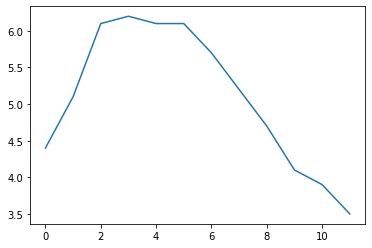

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

# Dataframes
Now we are moving towards dataframes and their useage. We are going to use a real world data for this. The data used is a Human Activity Recognition making use of inertial sensors data of smartphone. It has 6 activities of daily life. The dataset used was presented in following paper

Jennifer R. Kwapisz, Gary M. Weiss and Samuel A. Moore (2010). Activity Recognition using Cell Phone Accelerometers, Proceedings of the Fourth International Workshop on Knowledge Discovery from Sensor Data (at KDD-10), Washington DC

In [ ]:
# The following code downloads the dataset files from original resource
# Uncompress them. The code makes use of Linux commands. Don't worry about
# for this lab. We are going to use the file named WISDM_ar_v1.1_raw.txt
# inside the folder WISDM_ar_v1.1.
# If you run !ls in a new block it will print the contents of the working directory/folder you are in

!wget http://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz
!ls 
!tar -xvzf  WISDM_ar_latest.tar.gz
!ls WISDM_ar_v1.1

--2022-03-05 10:38:27--  http://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz
Resolving www.cis.fordham.edu (www.cis.fordham.edu)... 150.108.68.29
Connecting to www.cis.fordham.edu (www.cis.fordham.edu)|150.108.68.29|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz [following]
--2022-03-05 10:38:27--  https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz
Connecting to www.cis.fordham.edu (www.cis.fordham.edu)|150.108.68.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11404612 (11M) [application/x-gzip]
Saving to: ‘WISDM_ar_latest.tar.gz’

WISDM_ar_latest.tar 100%[===================>]  10.88M  15.1MB/s    in 0.7s    

2022-03-05 10:38:28 (15.1 MB/s) - ‘WISDM_ar_latest.tar.gz’ saved [11404612/11404612]

sample_data  WISDM_ar_latest.tar.gz
WISDM_ar_v1.1/
WISDM_ar_v1.1/readme.txt
WISD

The motivation of using a real world dataset is to get you similarize with problems being faced when deal of such data.
The first problem/issue with majority of the datasets is that they do not have column names. The one which we are using also not have. We have to read documentation for that. 
For this dataset we have data in such a way 'user-id',                 'activity', 'timestamp', 'x-axis', 'y-axis','z-axis'

In [ ]:
# Loading dataset file in a dataframe and see how data is taken by Pandas
file_path = './WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt'
df_problematic =  pd.read_csv(file_path,header=None,nrows=6)

In [ ]:
df_problematic.head()

,0,1,2,3,4,5
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


In [ ]:
df_problematic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6 non-null      int64  
 1   1       6 non-null      object 
 2   2       6 non-null      int64  
 3   3       6 non-null      float64
 4   4       6 non-null      float64
 5   5       6 non-null      object 
dtypes: float64(2), int64(2), object(2)
memory usage: 416.0+ bytes


Now two issues are there for this dataset. 
1- Dose not have colunm names (not a problem but not easy to use)
2- z-axis is taken as 'objects' type not 'float64' (Big Problem)

We know z-axis is of numaric nature and will be used by Classifier for training process. The reason is that there is a character ; appended to this colunm values which needs to be removed and import dataset again with colunm names

In [ ]:
column_names = ['user-id', 'activity', 'timestamp','x-axis','y-axis','z-axis'] # Create a list with colunm names
df = pd.read_csv(file_path, header=None, names=column_names) # Pass that case the colunm names
df['z-axis'].replace(regex=True, inplace=True, to_replace=r';',value=r'') # Removing the character ; with nothing

In [ ]:
df.head() # Checking again and we will see that ; is removed

,user-id,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [ ]:
df.info() # Still of object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user-id    1098204 non-null  int64  
 1   activity   1098204 non-null  object 
 2   timestamp  1098204 non-null  int64  
 3   x-axis     1098204 non-null  float64
 4   y-axis     1098204 non-null  float64
 5   z-axis     1098203 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 50.3+ MB


In [ ]:
import numpy as np 

# A helping function for convertion from string to float
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [ ]:
df['z-axis'] = df['z-axis'].apply(convert_to_float) # Calling the above function

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
df.info() # Checking again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user-id    1098204 non-null  int64  
 1   activity   1098204 non-null  object 
 2   timestamp  1098204 non-null  int64  
 3   x-axis     1098204 non-null  float64
 4   y-axis     1098204 non-null  float64
 5   z-axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [ ]:
df.head() # Checking again

,user-id,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


Now our data is clear for training of any classifier. You may save the preprocessed data to a CSV or Excel sheet

In [ ]:
df.to_csv('MyPreProcessedData.csv')

In [ ]:
from google.colab import files
files.download('MyPreProcessedData.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plotting with Matplotlib

In [ ]:
# You may see in last time we plot important parameters 
# It is always important to check dataset is balanced or not
# Balanced means that all classes has same number of entries
# Show how many training examples exist for each of the six activities
df['activity'].value_counts()

Walking       424398
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

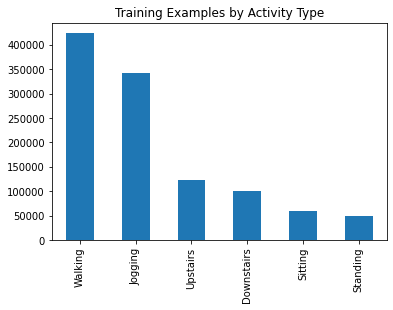

In [ ]:
# Matplotlib can be used with pandas for plotting data
from matplotlib import pyplot as plt
df['activity'].value_counts().plot(kind='bar',title='Training Examples by Activity Type')
plt.show()

# Practice Task
You are given a dataset file named entireDataset.txt which has EMG data for gestures classification. 

The sequence of the columns in the file should be such [ channel1	channel2	channel3	channel4	channel5	channel6	channel7	channel8	class]

There are a total of 8 classes in the dataset.

0 - unmarked data,
1 - hand at rest, 
2 - hand clenched in a fist, 
3 - wrist flexion,
4 – wrist extension,
5 – radial deviations,
6 - ulnar deviations,
7 - extended palm 

You need to load the data in a dataframe. Have to figure out if there is any problem with the data. Need to fix that problem (if you find any or multple problems). The channels are of numerical nature and will be used by classifiers in future. Need to plot a histogram and see if dataset is balanced or not. 
